This notebook shows how we transform ANN 7 from keras into pytorch 

In [1]:
import tensorflow as tf
from cbrain import *
import torch as to
from tensorflow.keras.layers import Input, Dense, Concatenate, Lambda,Dropout
from cbrain.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import LearningRateScheduler


import numpy as np
import matplotlib.pyplot as plt
import argparse
import os
import xarray as xr

import tensorflow.keras as ke


from cbrain.imports import *

from cbrain.utils import *

from cbrain.cam_constants import *

from cbrain.data_generator import DataGenerator
import pandas as ps

2023-06-29 14:12:31.730535: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# define some hyperparameters 

original_dim_input=109  # CBRAIN input node size

original_dim_output=int(112) # CBRAIN output node size 


input_shape = (original_dim_input,)
out_shape=(original_dim_output,)
intermediate_dim = 279

batch_size= 7800





In [4]:
# load keras model 
ANN_7=ke.models.load_model('real_geography/ANNs/ANNs_lin/ANN_7/ANN_7_CRM_lin_models.h5')
ANN_7.summary()
ANN_7_weights=ANN_7.get_weights()

batch_size= 7800


Model: "ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 109)]             0         
                                                                 
 dense (Dense)               (None, 279)               30690     
                                                                 
 dense_1 (Dense)             (None, 279)               78120     
                                                                 
 dense_2 (Dense)             (None, 279)               78120     
                                                                 
 dense_3 (Dense)             (None, 279)               78120     
                                                                 
 dense_4 (Dense)             (None, 279)               78120     
                                                                 
 dense_5 (Dense)             (None, 279)               78120   

2023-06-29 14:13:40.569674: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


import pytorch model 

In [6]:
import torch.nn as nn
import torch.nn.functional as F

In [7]:
# construct ANN 7 in pytorch

class ANN(nn.Module):
    def __init__(self):
        super(ANN,self).__init__()
        self.X_1=nn.Linear(109,323)
        self.X_2=nn.Linear(323,323)
        self.X_3=nn.Linear(323,323)
        self.X_4=nn.Linear(323,323)
        self.X_5=nn.Linear(323,323)
        self.X_6=nn.Linear(323,323)
        self.X_7=nn.Linear(323,323)
        self.X_8=nn.Linear(323,323)
        self.X_9=nn.Linear(323,112)
        self.X_10=nn.Linear(112,112)

    def forward(self,x):
        x=F.elu_(self.X_1(x))
        x=F.elu_(self.X_2(x))
        x=F.elu_(self.X_3(x))
        x=F.elu_(self.X_4(x))
        x=F.elu_(self.X_5(x))
        x=F.elu_(self.X_6(x))
        x=F.elu_(self.X_7(x))
        x=F.elu_(self.X_8(x))
        x=F.elu_(self.X_9(x))
        x=self.X_10(x)

        
        return x
    
    
        



        


In [9]:
#initialize ANN 7 

ANN_7_torch=ANN()
print(ANN_7_torch)

ANN(
  (X_1): Linear(in_features=109, out_features=323, bias=True)
  (X_2): Linear(in_features=323, out_features=323, bias=True)
  (X_3): Linear(in_features=323, out_features=323, bias=True)
  (X_4): Linear(in_features=323, out_features=323, bias=True)
  (X_5): Linear(in_features=323, out_features=323, bias=True)
  (X_6): Linear(in_features=323, out_features=323, bias=True)
  (X_7): Linear(in_features=323, out_features=323, bias=True)
  (X_8): Linear(in_features=323, out_features=323, bias=True)
  (X_9): Linear(in_features=323, out_features=112, bias=True)
  (X_10): Linear(in_features=112, out_features=112, bias=True)
)


load keras weights and biases into pytorch model

In [10]:
ANN_7_torch.X_1.weight.data=to.from_numpy(np.transpose(ANN_7_weights[0]))
ANN_7_torch.X_1.bias.data=to.from_numpy(np.transpose(ANN_7_weights[1]))
ANN_7_torch.X_2.weight.data=to.from_numpy(np.transpose(ANN_7_weights[2]))
ANN_7_torch.X_2.bias.data=to.from_numpy(np.transpose(ANN_7_weights[3]))
ANN_7_torch.X_3.weight.data=to.from_numpy(np.transpose(ANN_7_weights[4]))
ANN_7_torch.X_3.bias.data=to.from_numpy(np.transpose(ANN_7_weights[5]))
ANN_7_torch.X_4.weight.data=to.from_numpy(np.transpose(ANN_7_weights[6]))
ANN_7_torch.X_4.bias.data=to.from_numpy(np.transpose(ANN_7_weights[7]))
ANN_7_torch.X_5.weight.data=to.from_numpy(np.transpose(ANN_7_weights[8]))
ANN_7_torch.X_5.bias.data=to.from_numpy(np.transpose(ANN_7_weights[9]))
ANN_7_torch.X_6.weight.data=to.from_numpy(np.transpose(ANN_7_weights[10]))
ANN_7_torch.X_6.bias.data=to.from_numpy(np.transpose(ANN_7_weights[11]))
ANN_7_torch.X_7.weight.data=to.from_numpy(np.transpose(ANN_7_weights[12]))
ANN_7_torch.X_7.bias.data=to.from_numpy(np.transpose(ANN_7_weights[13]))
ANN_7_torch.X_8.weight.data=to.from_numpy(np.transpose(ANN_7_weights[14]))
ANN_7_torch.X_8.bias.data=to.from_numpy(np.transpose(ANN_7_weights[15]))
ANN_7_torch.X_9.weight.data=to.from_numpy(np.transpose(ANN_7_weights[16]))
ANN_7_torch.X_9.bias.data=to.from_numpy(np.transpose(ANN_7_weights[17]))
ANN_7_torch.X_10.weight.data=to.from_numpy(np.transpose(ANN_7_weights[18]))
ANN_7_torch.X_10.bias.data=to.from_numpy(np.transpose(ANN_7_weights[19]))


In [11]:
#define input and output vars 

in_vars = ['QBP', 'TBP','PS', 'SOLIN', 'SHFLX', 'LHFLX','PRECTt-dt','CLDLIQBP','CLDICEBP']
out_vars = ['QBCTEND','TBCTEND','CLDLIQBCTEND','CLDICEBCTEND','PREC_CRM_SNOW','PREC_CRM',
            'NN2L_FLWDS','NN2L_DOWN_SW','NN2L_SOLL','NN2L_SOLLD','NN2L_SOLS','NN2L_SOLSD']

#loading the output normalization scalars for SP variables ( stds over 2 months of SP simulation)

scale_array=ps.read_csv('nn_config/scale_dicts/real_geography_SP_vars_updt.csv')


QBC_std_surf=scale_array.QBCTEND_std.values[-1]

TBC_std=scale_array.TBCTEND_std.values[-1]
CLDLIQBCTEND_std=scale_array.CLDLIQBCTEND_std.values[-1]
CLDICEBCTEND_std=scale_array.CLDICEBCTEND_std.values[-1]


PREC_CRM_SNOW_std=scale_array.PRECT_CRM_SNOW_std.values
PREC_CRM_std=scale_array.PRECT_CRM_std.values

NN2L_FLWDS_std=scale_array.NN2L_FLWDS_std.values
NN2L_DOWN_SW_std=scale_array.NN2L_DOWN_SW_std.values
NN2L_SOLL_std=scale_array.NN2L_SOLL_std.values
NN2L_SOLLD_std=scale_array.NN2L_SOLLD_std.values
NN2L_SOLS_std=scale_array.NN2L_SOLS_mean_std.values
NN2L_SOLSD_std=scale_array.NN2L_SOLSD_mean_std.values





# defining the scaling dict for the ANN training 

scale_dict_II = {
    'QBCTEND': 1/QBC_std_surf, 
    'TBCTEND': 1/TBC_std, 
    'CLDICEBCTEND': 1/CLDICEBCTEND_std, 
    'CLDLIQBCTEND': 1/CLDLIQBCTEND_std, 
    'NN2L_FLWDS':1/NN2L_FLWDS_std,
    'NN2L_DOWN_SW':1/NN2L_DOWN_SW_std,
    'NN2L_SOLL':1/NN2L_SOLL_std,
    'NN2L_SOLLD':1/NN2L_SOLLD_std,
    'NN2L_SOLS':1/NN2L_SOLS_std,
    'NN2L_SOLSD':1/NN2L_SOLSD_std,    
    'PREC_CRM': 1/PREC_CRM_std,
    'PREC_CRM_SNOW': 1/PREC_CRM_SNOW_std
}




#load vertical axis in pressure coords 


from cbrain.data_generator import DataGenerator

test_xr=xr.open_dataset('/work/bd1179/from_Mistral/bd1179/b381624/CESM2_NN2_pelayout01_ens_07.cam.h1.2013-01-01-00000.nc')
hybi=test_xr.hybi
hyai=test_xr.hyai

PS = 1e5; P0 = 1e5;
P = P0*hyai+PS*hybi; # Total pressure [Pa]
dP = P[1:]-P[:-1];


# load test data set 

val_gen_II = DataGenerator(
    data_fn = '../SPCESM_data/2015_test_7_consec_days_mem.nc',
    input_vars = in_vars,
    output_vars = out_vars,
    norm_fn = '../SPCESM_data/2013_norm_7_consec_days_mem.nc',
    input_transform = ('mean', 'maxrs'),
    output_transform = scale_dict_II,
    batch_size=int(96*144),
    shuffle=True
)

In [12]:
from cbrain.save_weights import save_norm

In [13]:
# predict with keras and pytorch 
pred_keras= ANN_7.predict(val_gen_II[300][0])

432/432 [==============================] - 1s 2ms/step


In [14]:
print(pred_keras.shape)
pred_keras

(13824, 112)


array([[ 7.2108985e-13, -3.8530290e-13, -1.2534418e-13, ...,
         3.5099038e-01,  1.8521178e+00,  8.8786614e-01],
       [ 7.4440454e-13, -3.9779291e-13, -1.2942425e-13, ...,
         3.5211015e-01,  1.8518255e+00,  8.8831699e-01],
       [ 7.4285023e-13, -3.9740433e-13, -1.2921608e-13, ...,
         3.5209033e-01,  1.8518312e+00,  8.8830984e-01],
       ...,
       [-1.3425150e-11,  7.1748718e-12,  2.3339802e-12, ...,
         3.4568124e-03, -4.3600276e-03, -2.2438467e-03],
       [-1.3427370e-11,  7.1760375e-12,  2.3343827e-12, ...,
         3.4570880e-03, -4.3604523e-03, -2.2405684e-03],
       [-1.3348989e-11,  7.1343487e-12,  2.3207408e-12, ...,
         3.4189560e-03, -4.3485910e-03, -2.2817850e-03]], dtype=float32)

In [15]:
pred_pytorch=ANN_7_torch(to.from_numpy(val_gen_II[300][0]))

In [16]:
pred_pytorch

tensor([[ 7.2120e-13, -3.8530e-13, -1.2533e-13,  ...,  3.5099e-01,
          1.8521e+00,  8.8787e-01],
        [ 7.4418e-13, -3.9779e-13, -1.2942e-13,  ...,  3.5211e-01,
          1.8518e+00,  8.8832e-01],
        [ 7.4307e-13, -3.9746e-13, -1.2924e-13,  ...,  3.5209e-01,
          1.8518e+00,  8.8831e-01],
        ...,
        [-1.3425e-11,  7.1749e-12,  2.3340e-12,  ...,  3.4567e-03,
         -4.3600e-03, -2.2437e-03],
        [-1.3427e-11,  7.1759e-12,  2.3344e-12,  ...,  3.4570e-03,
         -4.3605e-03, -2.2407e-03],
        [-1.3349e-11,  7.1340e-12,  2.3207e-12,  ...,  3.4185e-03,
         -4.3486e-03, -2.2820e-03]], grad_fn=<AddmmBackward0>)

In [17]:
# get weights and biases 
module = to.jit.trace(ANN_7_torch.forward, to.from_numpy(val_gen_II[300][0]))

In [18]:
# get entire network 
mod = to.jit.trace(ANN_7_torch, to.from_numpy(val_gen_II[300][0]))

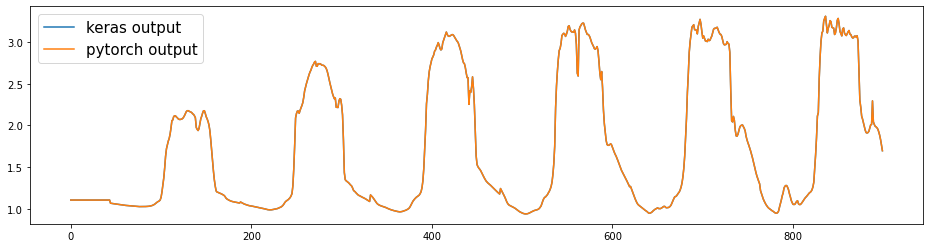

In [19]:
plt.figure(1,(16,4))
plt.plot(pred_keras[100:1000,106],label='keras output')
plt.plot(pred_pytorch.detach().numpy()[100:1000,106],label='pytorch output')
plt.legend(fontsize=15)

In [20]:
a=np.isclose(pred_keras,pred_pytorch.detach().numpy(),atol=2E-6)

In [21]:
a.shape

(13824, 112)

In [22]:
np.where(a==False)[0].size

229

In [23]:
np.where(a==True)[0].size

1548059

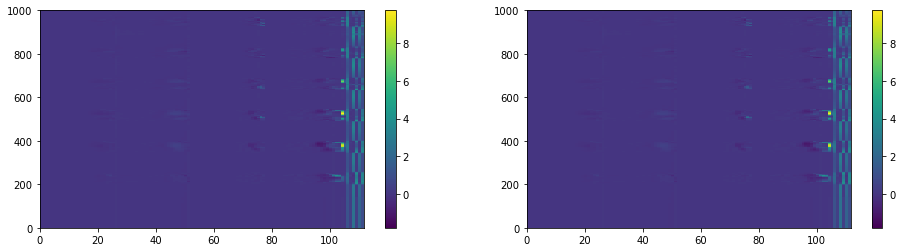

In [24]:
plt.figure(1,(16,4))
plt.subplot(1,2,1)
plt.pcolor(pred_keras[0:1000])
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolor(pred_pytorch.detach().numpy()[0:1000])
plt.colorbar()

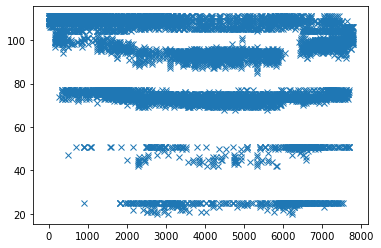

In [25]:
plt.plot(np.where(pred_keras-pred_pytorch.detach().numpy()>=1E-6)[1],'x')#np.max(pred_keras-pred_pytorch.detach().numpy()))

In [26]:
# save weights and biases 
to.save(ANN_7_torch,'real_geography/ANNs/ANN_7/ANN_7_CRM_lin.pt')

In [27]:
# save entire network 
to.jit.save(mod,'real_geography/ANNs/ANN_7/ANN_7_CRM_lin_jit.pt')